
Data Analysis and Simple Forecasting Methods with  Pandas 

In this notes, we will introduce the Pandas package and learn to perform basic data analysis and implement simple forecasting methods. 

## Part 1. Introduction
### 1. Pandas - Python Data Analysis Library
Pandas stands for "Panel Data". It is an open-source library providing high-performance data structures and data analysis. We will focus on the data type called DataFrame. 



In [2]:
import pandas as pd

## 2. Pandas DataFrames
The Pandas DataFrames are a **labeled** two-dimensional data structure and is similar in spirit to an Excel worksheet or a relational database table with labeled rows and columns.Typically,
* There can be multiple rows and columns in the data.
* Each row represents a sample of data.
* Each column contains a different variable that describes the samples (rows).
* The data in every column is usually the same type of data – e.g. numbers, strings, dates.


The DataFrame can be created in many different ways such as 
1. Using another DataFrame.
2. Using a NumPy array or a composite of arrays that has a two-dimensional shape.
3. Using Pandas Series.
4. Produced from a file, such as a CSV file.
5. From a dictionary of one-dimensional structure such as lists.

## Part 2. Creating DataFrames Manually and Basic Operations

### 1. Using the Pandas method `pd.DataFrame()`: 
* `pd.DataFrame(data, index=<Optional>, columns=<Optional>)`: convert other data types into DataFrame. It is optional to pass index (row labels) and columns (column labels) arguments.

We will start with examples on buidling DataFrames using the two basic data structures we have learned: lists and disctionaries. 

In [7]:
# list of dictionaries
data = [{'a': 1, 'b': 2, 'c': 3}, {'a': 5, 'b': 10, 'd': 20}]

In [8]:
df= pd.DataFrame(data, index=['first', 'second'])
df

,a,b,c,d
first,1,2,3.0,NaN
second,5,10,NaN,20.0


In [1]:
# state information as dictionary where values are lists. 
#area is measured in square kilometers and population is in headcount 
area_population={'California': [423967, 38332521], 
                 'Texas': [695662, 26448193], 
                 'New York':[141297, 19651127], 
                 'Florida':[170312, 19552860], 
                 'Illinois': [149995,12882135]}

In [3]:
area_pop=pd.DataFrame(area_population, index=['Area','Pop'])
area_pop

,California,Texas,New York,Florida,Illinois
Area,423967,695662,141297,170312,149995
Pop,38332521,26448193,19651127,19552860,12882135


### 2. Basic Data Manipulation 

* `df.rename({Old_index:New_index}, {Old_column:New_column}, inplace=True/False)` to change column or row names<br>


* `df.T` method can transpose the full dataframe df and swap rows and columns and return a new dataframe. Note that it does not change the original dataframe.

* `df.drop(index, columns, axis=0/1, inplace=True/False)` to drop columns or rows

* `df.sort_values(by=['column name'], ascending=True/Falese, inplace=True/False)` to sort the data by the values of a column

Parameters of the above functions:
1. index: dict-like or function, changing specified index values
2. columns: dict-like or function, changing specified columns
3. inplace: Makes the changes in the dataframe if True.
4. axis: 0 for rows, 1 for columns

In [4]:
states=area_pop.T
states

,Area,Pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [6]:
states.rename(columns={'Area':'A'})

,A,Pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [20]:
states

,Area,Pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [21]:
states['Density']=states['Pop']/states['Area']
states

,Area,Pop,Density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [24]:
st = states.drop('Density',axis=1)
st

,Area,Pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [23]:
states

,Area,Pop,Density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [25]:
states.sort_values(by=['Density'])

,Area,Pop,Density
Texas,695662,26448193,38.018740
Illinois,149995,12882135,85.883763
California,423967,38332521,90.413926
Florida,170312,19552860,114.806121
New York,141297,19651127,139.076746


In [26]:
states

,Area,Pop,Density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [30]:
states['Area'].std()

242437.41195058986

In [31]:
states[['Area','Density']]

,Area,Density
California,423967,90.413926
Texas,695662,38.018740
New York,141297,139.076746
Florida,170312,114.806121
Illinois,149995,85.883763


In [32]:
states.loc['Texas']

Area       6.956620e+05
Pop        2.644819e+07
Density    3.801874e+01
Name: Texas, dtype: float64

In [34]:
states.loc['Texas':'Florida',['Pop','Density']]

,Pop,Density
Texas,26448193,38.018740
New York,19651127,139.076746
Florida,19552860,114.806121


In [35]:
states.loc['Texas','Density']

38.01874042279153

In [36]:
states.iloc[:2,1:]

,Pop,Density
California,38332521,90.413926
Texas,26448193,38.018740


### 3. Data Selection in DataFrame

#### 3.1 Selecting a Single Column

* using a dot notation, e.g. data.column_name
* (recommended) using square braces and the name of the column as a string, e.g. `data['column_name']`
* using numeric indexing and the iloc selector `data.iloc[:, <column_number>]`
Note that basic operations such as summing (.sum()), averaging (.mean()), counting (.count()), and getting the median (.median()) can be carried out after selecting a single column.


#### 3.2 Selecting Multiple Columns 

* Using square-brace selection with a list of column names, e.g. `data[['column_name_1', 'column_name_2']]`.
* using the loc selector, e.g., `data.loc[:, ['column_name_1', 'column_name_2']]` or `data.loc[:, ['column_name_1':'column_name_2']]`.
* using numeric indexing with the iloc selector and a list of column numbers, e.g. `data.iloc[:, [0,1,5,8]]` for discontinued columns or  `data.iloc[:, 1:4]` for consecutive conlumns

#### 3.3 Selecting Rows or Data Points

* access a row or multiple rows: `data.loc[row_name1:row_name2,:]` or `data.iloc[row_index1:row_index2,:]` 
* access a single data point by `df.loc['row_name','column_name']` or `df.iloc['row_index','column_index']` .

#### 3.4 Logic-based Row Selection
Extract data with specified conditions with `df.loc[<conditions based on column values>, [column_name(s)]]`

#### 3.5 Using for loop and df.index to traverse over rows 
```
for i in df.index:
            actions 

```
We can call individual data points using `df.loc[i,column]` inside the loop.
             


In [39]:
states.loc[(states['Density']>70) & (states['Area']<200000),['Pop','Density']]

,Pop,Density
New York,19651127,139.076746
Florida,19552860,114.806121
Illinois,12882135,85.883763


In [40]:
for i in states.index:
    print('The state of %s has a population of %i.'%(i,states.loc[i,'Pop']))

The state of California has a population of 38332521.
The state of Texas has a population of 26448193.
The state of New York has a population of 19651127.
The state of Florida has a population of 19552860.
The state of Illinois has a population of 12882135.


### 4. Add Columns or Rows to DataFrames

Both `df.assign` can add new columns to a DataFrame
1. `df.assign(newColumn1 = <list1>,...,newColumn_n = <listn> )`:  always returns a new object with all original columns in addition to new ones.
2. `df[newColumn] = int or str` can add a column of the same value as int or str.

3. The `pd.concat([df1, df2],axis=0/1, sort = True/False)` function concatenates DataFrames-that is, combining two DataFrames together along a particular axis({0/’index’, 1/’columns’}, default 0). sort = True/False indicating sorting non-concatenation axis or not.

In [41]:
states['Irrelevant']=40
states

,Area,Pop,Density,Irrelevant
California,423967,38332521,90.413926,40
Texas,695662,26448193,38.018740,40
New York,141297,19651127,139.076746,40
Florida,170312,19552860,114.806121,40
Illinois,149995,12882135,85.883763,40


In [42]:
#it returns a new DataFrame while the original one remains the same
states=states.assign(Nowhere = list(range(1,6)))
states

,Area,Pop,Density,Irrelevant,Nowhere
California,423967,38332521,90.413926,40,1
Texas,695662,26448193,38.018740,40,2
New York,141297,19651127,139.076746,40,3
Florida,170312,19552860,114.806121,40,4
Illinois,149995,12882135,85.883763,40,5


In [43]:
data = {'Pop':[12801989,9883635], 'Area':[119283,250493]}
newState = pd.DataFrame(data, index=['Pennsylvania','Michigan'])
newState['Density']=newState['Pop']/newState['Area']
newState

,Pop,Area,Density
Pennsylvania,12801989,119283,107.324506
Michigan,9883635,250493,39.456731


In [44]:
states= pd.concat([states, newState], sort=False)
states

,Area,Pop,Density,Irrelevant,Nowhere
California,423967,38332521,90.413926,40.0,1.0
Texas,695662,26448193,38.018740,40.0,2.0
New York,141297,19651127,139.076746,40.0,3.0
Florida,170312,19552860,114.806121,40.0,4.0
Illinois,149995,12882135,85.883763,40.0,5.0
Pennsylvania,119283,12801989,107.324506,NaN,NaN
Michigan,250493,9883635,39.456731,NaN,NaN


In [45]:
print(pd.concat([states,states],axis=1)) #by default, axis=0, meaning the indexes or rows to concatenate along. axis=1, along columns

                Area       Pop     Density  Irrelevant  Nowhere    Area  \
California    423967  38332521   90.413926        40.0      1.0  423967   
Texas         695662  26448193   38.018740        40.0      2.0  695662   
New York      141297  19651127  139.076746        40.0      3.0  141297   
Florida       170312  19552860  114.806121        40.0      4.0  170312   
Illinois      149995  12882135   85.883763        40.0      5.0  149995   
Pennsylvania  119283  12801989  107.324506         NaN      NaN  119283   
Michigan      250493   9883635   39.456731         NaN      NaN  250493   

                   Pop     Density  Irrelevant  Nowhere  
California    38332521   90.413926        40.0      1.0  
Texas         26448193   38.018740        40.0      2.0  
New York      19651127  139.076746        40.0      3.0  
Florida       19552860  114.806121        40.0      4.0  
Illinois      12882135   85.883763        40.0      5.0  
Pennsylvania  12801989  107.324506         NaN     

## Do-It-Yourself Exercise

Create a DataFrame set with given student test information shown in the code cell below. Write code to perform the following tasks:<br>

1. get the first 3 rows.
2. get the columns 'name' and 'score'
3. get the test score of Emily
4. change the score in row 'd' to 11.5.
5. select the rows where the number of attempts in the examination is greater than 2.
6. select the rows the score is between 15 and 20 (inclusive).
7. calculate the sum of the examination attempts by the students.
8. calculate the average of the examination scores of the students.

Challenge
9. add a column 'quality' such that it is 'yes' if a student's score is 10 or above, and 'no' otherwise.

In [46]:
exam_data  = {'name': ['Anastasia', 'Dima', 'Katherine', 'James', 'Emily', 'Michael', 'Matthew', 'Laura', 'Kevin', 'Jonas'],
        'score': [12.5, 9, 16.5, 6, 9, 20, 14.5, 7.5, 8, 19],
        'attempts': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1]}
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
df = pd.DataFrame(exam_data , index=labels)
df

,name,score,attempts
a,Anastasia,12.5,1
b,Dima,9.0,3
c,Katherine,16.5,2
d,James,6.0,3
e,Emily,9.0,2
f,Michael,20.0,3
g,Matthew,14.5,1
h,Laura,7.5,1
i,Kevin,8.0,2
j,Jonas,19.0,1


In [47]:
#Q1
df.loc['a':'c']

,name,score,attempts
a,Anastasia,12.5,1
b,Dima,9.0,3
c,Katherine,16.5,2


In [48]:
df['a':'c']

,name,score,attempts
a,Anastasia,12.5,1
b,Dima,9.0,3
c,Katherine,16.5,2


In [49]:
#Q2
df.loc[:,['name','score']]

,name,score
a,Anastasia,12.5
b,Dima,9.0
c,Katherine,16.5
d,James,6.0
e,Emily,9.0
f,Michael,20.0
g,Matthew,14.5
h,Laura,7.5
i,Kevin,8.0
j,Jonas,19.0


In [50]:
df[['name','score']]

,name,score
a,Anastasia,12.5
b,Dima,9.0
c,Katherine,16.5
d,James,6.0
e,Emily,9.0
f,Michael,20.0
g,Matthew,14.5
h,Laura,7.5
i,Kevin,8.0
j,Jonas,19.0


In [52]:
#Q3
df.loc['e','score']

9.0

In [53]:
df.loc[df['name']=='Emily','score']

e    9.0
Name: score, dtype: float64

In [54]:
#Q4
df.loc['d','score']11.5
df

,name,score,attempts
a,Anastasia,12.5,1
b,Dima,9.0,3
c,Katherine,16.5,2
d,James,11.5,3
e,Emily,9.0,2
f,Michael,20.0,3
g,Matthew,14.5,1
h,Laura,7.5,1
i,Kevin,8.0,2
j,Jonas,19.0,1


In [55]:
#5
df.loc[df['attempts']>2]

,name,score,attempts
b,Dima,9.0,3
d,James,11.5,3
f,Michael,20.0,3


In [56]:
#6
df.loc[(df['score']>15)&(df['score']<=20)]

,name,score,attempts
c,Katherine,16.5,2
f,Michael,20.0,3
j,Jonas,19.0,1


In [57]:
#7
df['attempts'].sum()

19

In [58]:
#8
df['score'].mean()

12.75

In [59]:
#Q9
df.loc[df['score']>=10, 'qualify'] = 'yes'
df

,name,score,attempts,qualify
a,Anastasia,12.5,1,yes
b,Dima,9.0,3,NaN
c,Katherine,16.5,2,yes
d,James,11.5,3,yes
e,Emily,9.0,2,NaN
f,Michael,20.0,3,yes
g,Matthew,14.5,1,yes
h,Laura,7.5,1,NaN
i,Kevin,8.0,2,NaN
j,Jonas,19.0,1,yes


In [61]:
#Q9
df.loc[df['score']<10,'qualify']='no'
df

,name,score,attempts,qualify
a,Anastasia,12.5,1,yes
b,Dima,9.0,3,no
c,Katherine,16.5,2,yes
d,James,11.5,3,yes
e,Emily,9.0,2,no
f,Michael,20.0,3,yes
g,Matthew,14.5,1,yes
h,Laura,7.5,1,no
i,Kevin,8.0,2,no
j,Jonas,19.0,1,yes


## Part 3. Data Analysis with DataFrames Created from Files  
In this part, we will learn reading data from files as a Pandas DataFrame and performing data analysis and visualization. 

### 1. Loading and Previewing Data

Pandas DataFrames can be easily created from all kinds of data files, such as csv, Excel and SQL, by calling the functions `read_csv()`, `read_xlsx()`, and `read_sql()`. 

The dataset we will use is from the forecasting textbook. It is the quarterly Australian beer production in megaliter (or 1 million liters) from 1956 to 2010.

* `read_csv(filepath, index_col=column_name)`: read the file specified by the file path and set the <column_name> as the index column (optional).

It is easy to get tripped up with paths. Make sure your file is in the same directory you’re working in.

In [62]:
beer = pd.read_csv('data/beer_data.csv',index_col=['Date']) 

### 2. Data Displaying and Basic Descriptive Statistics
The following methods are often used to display a large data set. 
* `DataFrame.head(<int>)`: shows the top <int> rows of data in the DataFrame. 
* `DataFrame.tail(<int>)`: shows the last 5 rows of data in the DataFrame.
  These two functions show top or last 5 rows if no input argument is specified. 
* `DataFrame.shape()`: returns a tuple with the number of rows and the number of columns
* `DataFrame.dtypes`: returns the types of each column


The Pandas DataFrame has a dozen statistical methods, including
1. `DataFrame.describe()` returns a small table with descriptive statistics.
2. `DataFrame.count()` returns the number of non-NaN items
3. `DataFrame.min()` and `df.max()` return the lowest and highest values, respectively.
4. `DataFrame.mean()` returns the average.
5. `DataFrame.std()` returns the standard deviation.

These functions also can be applied to individual columns such as `DataFrame[column_name].describe()`.

In [64]:
beer.head(10)

,Time,Year,Quarter,Production
Date,,,,
1/1/1956,1,1956,Q1,284
4/1/1956,2,1956,Q2,213
7/1/1956,3,1956,Q3,227
10/1/1956,4,1956,Q4,308
1/1/1957,5,1957,Q1,262
4/1/1957,6,1957,Q2,228
7/1/1957,7,1957,Q3,236
10/1/1957,8,1957,Q4,320
1/1/1958,9,1958,Q1,272


In [65]:
beer.tail()

,Time,Year,Quarter,Production
Date,,,,
4/1/2009,214,2009,Q2,398
7/1/2009,215,2009,Q3,419
10/1/2009,216,2009,Q4,488
1/1/2010,217,2010,Q1,414
4/1/2010,218,2010,Q2,374


In [68]:
beer.dtypes

Time           int64
Year           int64
Quarter       object
Production     int64
dtype: object

In [69]:
beer.describe()

,Time,Year,Production
count,218.000000,218.000000,218.000000
mean,109.500000,1982.752294,415.371560
std,63.075352,15.770331,85.880662
min,1.000000,1956.000000,213.000000
25%,55.250000,1969.000000,379.250000
50%,109.500000,1983.000000,422.000000
75%,163.750000,1996.000000,465.750000
max,218.000000,2010.000000,599.000000


### 3. Data Preparation

#### 3.1 Setting Index
DataFrame.set_index(keys, inplace=False)
* keys: Column name or list of column name.
* inplace: Makes the changes in the existing dataframe if True. Otherwise, create a new dataframe. 




#### 3.2 Setting DataTime for Time Series Data
Right now our index is actually just a list of strings that look like a date. Pandas provides a Timestamp object to handle dates, times and time-series data. 

The funtion `pd.to_datetime(arg)` can convert an argument (strings, lists, arrays and DataFrame)  into the datatime type, which, by default, takes the format "yyyy-mm-dd hh:mm:ss" where the hour/minute/second is  omitted in lists and DataFrames. 

Alternatively, we can set a parameter to parse data as datatime when reading the csv file:
`beer = pd.read_csv('data/beer_data.csv',parse_dates=['Date'], index_col='Date' ) `


In [70]:
beer.index = pd.to_datetime(beer.index)

In [71]:
beer.head()

,Time,Year,Quarter,Production
Date,,,,
1956-01-01,1,1956,Q1,284
1956-04-01,2,1956,Q2,213
1956-07-01,3,1956,Q3,227
1956-10-01,4,1956,Q4,308
1957-01-01,5,1957,Q1,262


### 4. Data Aggregation and Plotting

The `DataFrame.groupby()` operation is a split-apply-combine operation. It breaks up a dataframe and groups it according to specified keys. The apply-step involves computing some function withine the individual groups. The combine-step merges the results of these operations into an output array. 
* `DataFrame.groupby(column_name1)[column_name2].<operation>()`: call `.groupby()` and pass the name of the column you want to group on, which is column_name1. Then, you use `[column_name2]` to specify the column(s) on which you want to perform the actual aggregation operations.



Matplotlib is a library for data visualization in Python. It is a well-tested, corss-platform graphics engine. It can be used independently, or used with Pandas as a wrapper around its API. We will learn the latter and show how to plot dataframes using `DataFrame.plot()`. 

`DataFrame.plot(x=<column_name for x axis>, y=<column_names for y axis>)` is the basic syntax. Other parameters include:

1. kind = 'line'(default),'bar','hist','pie','scatter', and so on.
2. figsize=(width, height) in inches
3. title = str or list, used as the title for the graph.
4. xticks (yticks) = sequence: Values to use for the xticks (yticks).
5. xlim (ylim) = (a, b), specifying the minimum and maximum value on the x (y)axis.
6. legend = True/False: Place legend on axis subplots



In [72]:
beer.groupby('Year')['Production'].mean()

Year
1956    258.00
1957    261.50
1958    263.75
1959    263.00
1960    271.00
1961    281.00
1962    286.25
1963    297.50
1964    314.00
1965    327.75
1966    333.25
1967    349.75
1968    370.25
1969    380.50
1970    396.00
1971    411.50
1972    424.00
1973    459.25
1974    479.00
1975    485.25
1976    486.00
1977    490.50
1978    499.50
1979    487.25
1980    484.75
1981    508.00
1982    495.50
1983    462.50
1984    463.00
1985    464.50
1986    462.50
1987    468.75
1988    489.75
1989    479.75
1990    488.50
1991    474.50
1992    451.25
1993    444.00
1994    446.00
1995    442.50
1996    428.00
1997    440.50
1998    436.25
1999    440.75
2000    434.25
2001    434.75
2002    437.00
2003    431.50
2004    422.75
2005    427.25
2006    430.00
2007    419.25
2008    427.00
2009    430.00
2010    394.00
Name: Production, dtype: float64

In [74]:
beer.groupby('Quarter')['Production'].std()

Quarter
Q1    73.160425
Q2    71.293990
Q3    69.341457
Q4    84.003744
Name: Production, dtype: float64

In [75]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [76]:
# enable graphs be included in your notebook, next to the code.
%matplotlib inline

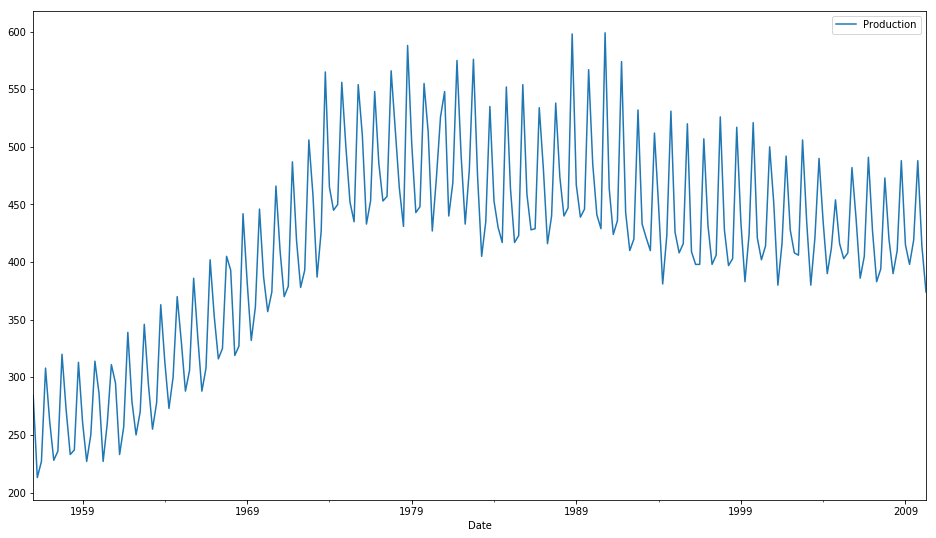

In [79]:
beer.plot(y='Production',figsize=(16,9))

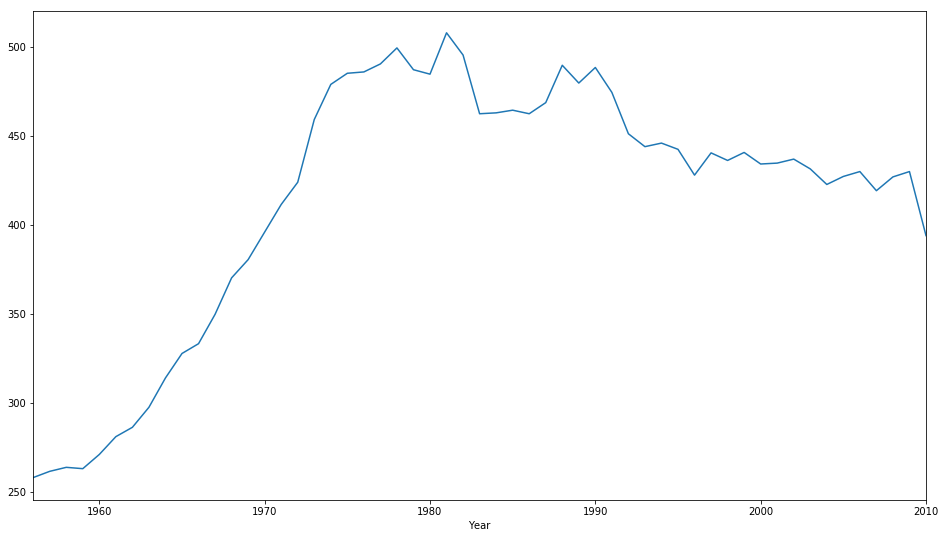

In [80]:
beer.groupby('Year')['Production'].mean().plot(figsize=(16,9))

Quarter
Q1    AxesSubplot(0.125,0.125;0.775x0.755)
Q2    AxesSubplot(0.125,0.125;0.775x0.755)
Q3    AxesSubplot(0.125,0.125;0.775x0.755)
Q4    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Production, dtype: object

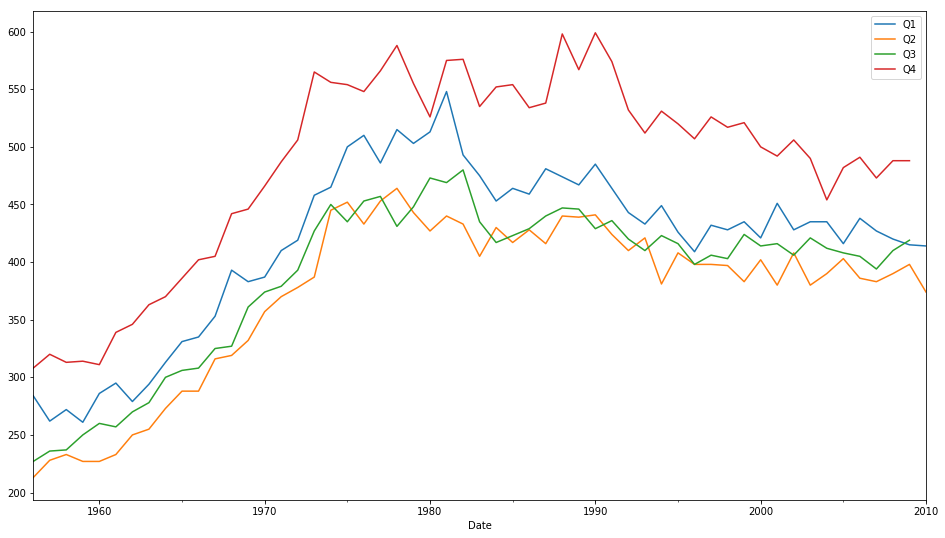

In [82]:
beer.groupby('Quarter')['Production'].plot(figsize=(16,9),legend=True)

###  5. Simple Forecasting Methods 
We will use the data from 1992-2007 as training set and 2008-2010 as the test set. The three simple methods we will test and compare are the average method, the naive method and the seasonal naive and seasonable average. Here are the steps we will take to implement these  forecasting methods:

Step 1: Create DataFrames for training set and test set<br>
Step 2: Generate forecasts for each method and store them in DataFrame <br>
Step 3: Plot the forecasts with the test data<br>
Step 4: Evaluate the forecasting errors of each method


In [83]:
train = beer.loc['1992-01-01':'2007-10-01']
train_num = train['Production'].count()
print(train_num)
train.head()

64


,Time,Year,Quarter,Production
Date,,,,
1992-01-01,145,1992,Q1,443
1992-04-01,146,1992,Q2,410
1992-07-01,147,1992,Q3,420
1992-10-01,148,1992,Q4,532
1993-01-01,149,1993,Q1,433


In [84]:
test = beer.loc['2008-01-01':]
test_num = test['Production'].count()
print(test_num)
test.head()

10


,Time,Year,Quarter,Production
Date,,,,
2008-01-01,209,2008,Q1,420
2008-04-01,210,2008,Q2,390
2008-07-01,211,2008,Q3,410
2008-10-01,212,2008,Q4,488
2009-01-01,213,2009,Q1,415


### 5.1 Average Method
Use the mean of the historical data as the forecast for all periods in the forecast horizon.

In [85]:
#find the mean as the forecast 
avg_forecast = train['Production'].mean()

In [87]:
#create a list with the forecast value for all the test period
avg_list=[avg_forecast]*test_num
avg_list

[435.375,
 435.375,
 435.375,
 435.375,
 435.375,
 435.375,
 435.375,
 435.375,
 435.375,
 435.375]

In [88]:
#add a column with the forecast value to the test set
test=test.assign(Mean =avg_list)
test.head()

,Time,Year,Quarter,Production,Mean
Date,,,,,
2008-01-01,209,2008,Q1,420,435.375
2008-04-01,210,2008,Q2,390,435.375
2008-07-01,211,2008,Q3,410,435.375
2008-10-01,212,2008,Q4,488,435.375
2009-01-01,213,2009,Q1,415,435.375


### 5.2 Naive Method
Use the most recently observed data as the forecast for all periods in the forecast horizon..

In [90]:
#find the last observed data point as the forecast 
naiv_forcast=train['Production'][-1]
naiv_forcast

473

In [91]:
#create a list with the forecast value for all the test period
naive_list = [naiv_forcast]*test_num
naive_list

[473, 473, 473, 473, 473, 473, 473, 473, 473, 473]

In [92]:
#add a column with the forecast value to the test set
test=test.assign(Naive = naive_list)
test

,Time,Year,Quarter,Production,Mean,Naive
Date,,,,,,
2008-01-01,209,2008,Q1,420,435.375,473
2008-04-01,210,2008,Q2,390,435.375,473
2008-07-01,211,2008,Q3,410,435.375,473
2008-10-01,212,2008,Q4,488,435.375,473
2009-01-01,213,2009,Q1,415,435.375,473
2009-04-01,214,2009,Q2,398,435.375,473
2009-07-01,215,2009,Q3,419,435.375,473
2009-10-01,216,2009,Q4,488,435.375,473
2010-01-01,217,2010,Q1,414,435.375,473


### 5.3 Seasonal Naive Method
Use the last observed value from the same season as the forecast.

In [93]:
#extract the last observed value from each season
s_forecast = list(train.loc['2007-01-01':, 'Production'])
s_forecast

[427, 383, 394, 473]

In [94]:
#wrap the forecast in a dictionary
#The functions dict() and zip() used together can convert two lists into a dictionary
s=dict(zip(['Q1','Q2','Q3','Q4'],s_forecast))
s

{'Q1': 427, 'Q2': 383, 'Q3': 394, 'Q4': 473}

In [95]:
#create a list of forecast for all the test period
season=[s[test.loc[i,'Quarter']] for i in test.index]
season

[427, 383, 394, 473, 427, 383, 394, 473, 427, 383]

In [96]:
#add a column with the forecast value to the test set
test=test.assign(SeasonNaive=season)
test

,Time,Year,Quarter,Production,Mean,Naive,SeasonNaive
Date,,,,,,,
2008-01-01,209,2008,Q1,420,435.375,473,427
2008-04-01,210,2008,Q2,390,435.375,473,383
2008-07-01,211,2008,Q3,410,435.375,473,394
2008-10-01,212,2008,Q4,488,435.375,473,473
2009-01-01,213,2009,Q1,415,435.375,473,427
2009-04-01,214,2009,Q2,398,435.375,473,383
2009-07-01,215,2009,Q3,419,435.375,473,394
2009-10-01,216,2009,Q4,488,435.375,473,473
2010-01-01,217,2010,Q1,414,435.375,473,427


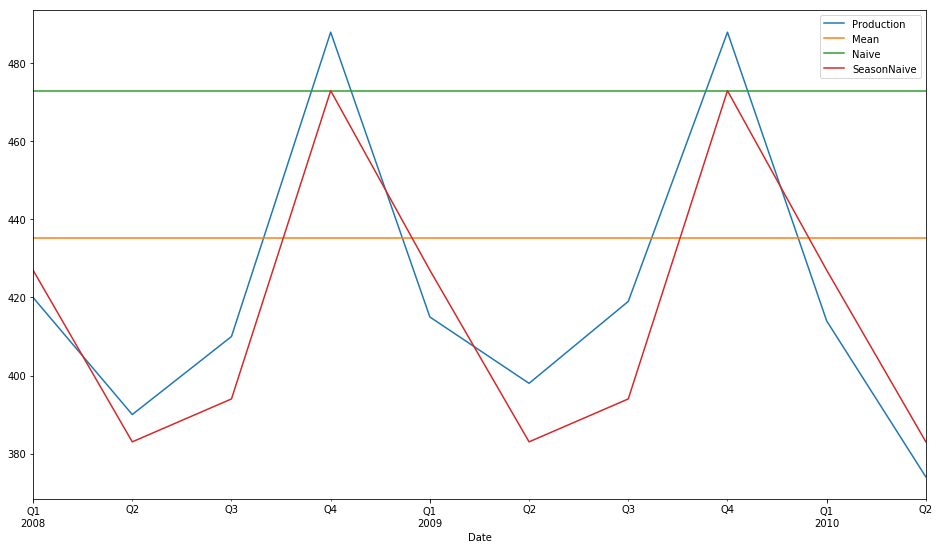

In [102]:
test.plot(y=['Production','Mean','Naive','SeasonNaive'],figsize=(16,9))

### 5.4 Calculating Forecasting Errors

In [100]:
#create a function to calculate the errors for all the methods
def errors(data, forecast, method):
    error = data - forecast
    MAE = abs(error).mean()
    RMSE = (error**2).mean()**0.5
    MAPE = abs(error/data).mean()*100
    print('%-20s: MAE=%-8.2f RMSE=%-8.2f MAPE=%.2f%%' %(method,MAE,RMSE,MAPE))

In [101]:
errors(test['Production'],test['Mean'],'Mean Method')
errors(test['Production'],test['Naive'],'Naive Method')
errors(test['Production'],test['SeasonNaive'],'SeasonNaive Method')

Mean Method         : MAE=34.83    RMSE=38.45    MAPE=8.28%
Naive Method        : MAE=57.40    RMSE=62.69    MAPE=14.18%
SeasonNaive Method  : MAE=13.40    RMSE=14.31    MAPE=3.17%


In [ ]:
error = test['Production'] - test['Mean']
cross_def = [abs(train['Production'][i+1]-train['Production'][i]) for i in range(train_num-1)]
abs_def=0
for i in cross_def:
    abs_def+=i
q = error/abs_def
MASE = abs(q).mean()*100
MASE